<a href="https://colab.research.google.com/github/Taykehrle/Random-Forest-winequality-/blob/main/Random_Forest_regression_para_Wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Random Forest**

**É um ensemble de árvores de decisão**

Combinação de diversos algoritmos com o objetivo de obter melhores resultados

- Classificação> Votação -> classe + popular/frequente -> escolhida
- Regressão> Média das regressões de todas as árvores

**Vantagem da Random Forest**: Uma das dificuldades que o cientista de dados tem na análise de variáveis, é quando temos muitas variáveis(redução de dimensionalidade) ou featuring engineering. Um dos problemas nos contextos de redução de dimensionalidade consiste em: Como fazer para selecionar as melhores variáveis.

*A Random Forest, pode ser utilizada para fazer a seleção de variáveis.*
*Criar um sistema decisional em Machine Learning.

Também pode ser usado em relação aos missing values.
Outra observação é que "dizem" que ela é mais resistente ao overfitting.

**Desvantagens da Random Forest:** 

-Lento

-Difícil interpretação


In [1]:
# Importando as bibliotecas que serão utilizadas
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Carregando a base de dados e fazendo os checks iniciais

wine = pd.read_csv("/content/winequality-red.csv", sep=";")
wine.shape

(1599, 12)

In [3]:
base_cc = pd.read_csv("/content/cc_approvals.data", header = None)
print(base_cc.shape)

(690, 16)


### **Wine - Tratamento da base**

In [4]:
# Eliminando as correlações e reescrevendo a base

correl_total = wine.corr().abs()

superior = correl_total.where(np.triu(np.ones(correl_total.shape),k = 1).astype(np.bool))
var_remove = [variaveis for variaveis in superior.columns if any(superior[variaveis] > 0.5)]

wine = wine.drop(wine[var_remove], axis=1)

#Separando os dados com as variaveis em x e o alvo em y
x_wine = wine.drop("quality",axis = 1)
y_wine = wine["quality"]

x_train_wine,x_test_wine,y_train_wine, y_test_wine = train_test_split(x_wine, y_wine, test_size = 0.50,random_state=42)

### **RF para a tarefa de regressão - base Wine**

In [18]:
# Treinamento do modelo

rf_wine = RandomForestRegressor(bootstrap=True,
                                criterion = 'mse',max_depth = 3
                                , max_features='auto',
                                min_samples_leaf = 1, min_samples_split = 2,
                                n_estimators = 100, n_jobs = 5,oob_score = True)
rf_wine.fit(x_train_wine,y_train_wine)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=5, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [19]:
# PRediçoes para o treinamento e teste

y_pred_train_wine = rf_wine.predict(x_train_wine)
y_pred_test_wine = rf_wine.predict(x_test_wine)


In [20]:
# Avaliação dos resultados

MAE_train_wine = metrics.mean_absolute_error(y_train_wine, y_pred_train_wine)
R2_train_wine = metrics.r2_score(y_train_wine,y_pred_train_wine)
RMSE_train_wine = sqrt(metrics.mean_squared_error(y_train_wine,y_pred_train_wine))

print("-"*20)
print("Avaliação de treinamento")
print("-"*20)
print("MAE: ",round(MAE_train_wine,2))
print("R2: ",round(R2_train_wine,2))
print("RMSE: ",round(RMSE_train_wine,2))


MAE_test_wine = metrics.mean_absolute_error(y_test_wine, y_pred_test_wine)
R2_test_wine = metrics.r2_score(y_test_wine,y_pred_test_wine)
RMSE_test_wine = sqrt(metrics.mean_squared_error(y_test_wine,y_pred_test_wine))

print("-"*20)
print("Avaliação de teste")
print("-"*20)
print("MAE: ",round(MAE_test_wine,2))
print("R2: ",round(R2_test_wine,2))
print("RMSE: ",round(RMSE_test_wine,2))

--------------------
Avaliação de treinamento
--------------------
MAE:  0.47
R2:  0.43
RMSE:  0.6
--------------------
Avaliação de teste
--------------------
MAE:  0.53
R2:  0.34
RMSE:  0.66


In [21]:
# Olhando apenas para a base de teste


print("-"*20)
print("A qualidade média de vinho da base é:")
print("-"*20)
print(round(y_test_wine.mean(),2))
print("-"*20)
print("O percentual do MAE em relação à média da base:")
print(round(metrics.mean_absolute_error(y_test_wine,y_pred_test_wine)/y_pred_test_wine.mean()*100,2))


--------------------
A qualidade média de vinho da base é:
--------------------
5.63
--------------------
O percentual do MAE em relação à média da base:
9.41


### **Análise da importância das variáveis**

In [22]:
# Analisando a importância das variáveis

imp = pd.DataFrame({'Variaveis':x_train_wine.columns,'Importancia':rf_wine.feature_importances_})

print(imp.sort_values(by=['Importancia'],ascending = False))

             Variaveis  Importancia
6              alcohol     0.644741
5            sulphates     0.165073
1     volatile acidity     0.141959
0        fixed acidity     0.015938
3            chlorides     0.014193
4  free sulfur dioxide     0.010971
2       residual sugar     0.007125


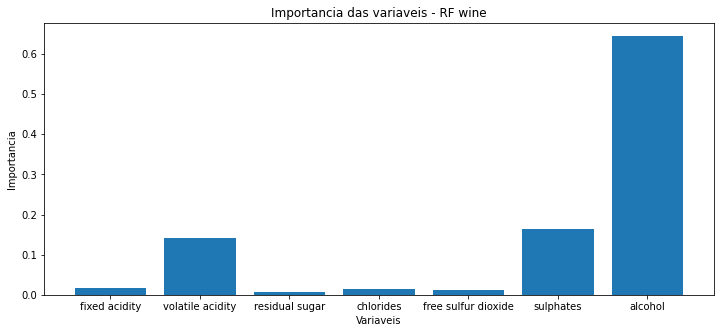

In [24]:
# Analisando no gráfico

plt.figure(figsize= (12,5))
plt.xticks(range(len(imp)),imp['Variaveis'])
plt.xlabel('Variaveis')
plt.ylabel('Importancia')
plt.title('Importancia das variaveis - RF wine')
plt.bar(range(len(imp)),imp['Importancia']);

In [26]:
# Retreinando o modelo apenas com as variáveis mais importantes

sub_wine = wine.loc[:,['alcohol','sulphates','volatile acidity','quality']]

# Separando os dados com as variáveis em x e o alvo em y
x_wine = sub_wine.drop('quality',axis = 1)
y_wine = sub_wine['quality']

x_train_wine, x_test_wine,y_train_wine,y_test_wine = train_test_split(x_wine,y_wine,test_size=0.50)

In [28]:
# Treinando o modelo2
rf_wine2 = RandomForestRegressor(bootstrap=True,
                                 criterion= 'mse',max_depth=3, max_features='auto',
                                 min_samples_leaf=1,min_samples_split=2,
                                 n_estimators=1000,n_jobs=5,oob_score=True)
rf_wine2.fit(x_train_wine,y_train_wine)

#Predições para o treinamento e teste

y_pred_train_wine = rf_wine2.predict(x_train_wine)
y_pred_test_wine = rf_wine2.predict(x_test_wine)

# Avaliação dos resultados
MAE_train_wine = metrics.mean_absolute_error(y_train_wine,y_pred_train_wine)
R2_train_wine = metrics.r2_score(y_train_wine,y_pred_train_wine)
RMSE_train_wine = sqrt(metrics.mean_squared_error(y_train_wine,y_pred_train_wine))

In [29]:
# Olhando apenas para a base de teste


print("-"*20)
print("A qualidade média de vinho da base é:")
print("-"*20)
print(round(y_test_wine.mean(),2))
print("-"*20)
print("O percentual do MAE em relação à média da base:")
print(round(metrics.mean_absolute_error(y_test_wine,y_pred_test_wine)/y_pred_test_wine.mean()*100,2))

--------------------
A qualidade média de vinho da base é:
--------------------
5.61
--------------------
O percentual do MAE em relação à média da base:
9.08


In [ ]:
# Temos um modelo melhor - não necessariamente em performance direta, mas menos complexo dado o número menor
# de variáveis